In [12]:
import trompy as tp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.max_rows= 4000
pd.options.display.max_columns= 4000

In [17]:
%run ..//source/FED_FUNCTIONS_TO_PLOT_TRENDS.py

FEDXA01 dict_keys(['sex', 'order', 'grain_timestamps', 'pr_timestamps', 'nr_timestamps', 'pr_meal_size', 'pr_snack_size', 'pr_number_of_meals', 'pr_meal_frequency', 'pr_number_of_snacks', 'pr_snack_frequency', 'pr_hourly_meals', 'pr_mega_meal_count', 'pr_average_mega_meal_size', 'nr_meal_size', 'nr_snack_size', 'nr_number_of_meals', 'nr_meal_frequency', 'nr_number_of_snacks', 'nr_snack_frequency', 'nr_hourly_meals', 'nr_mega_meal_count', 'nr_average_mega_meal_size', 'pr_meals_per_day', 'nr_meals_per_day', 'pr_snacks_per_day', 'nr_snacks_per_day', 'pr_mega_meals_per_day', 'nr_mega_meals_per_day', 'grain_pellets_per_day', 'pr_pellets_per_day', 'nr_pellets_per_day', 'all_pellets_per_day', 'all_meals_per_day', 'all_snacks_per_day', 'all_mega_meals_per_day', 'interpellet_intervals_pr', 'intermeal_interval_pr', 'mealsize_pr', 'interpellet_intervals_nr', 'intermeal_interval_nr', 'mealsize_nr'])
FEDXA02 dict_keys(['sex', 'order', 'grain_timestamps', 'pr_timestamps', 'nr_timestamps', 'pr_meal_s

In [18]:
mice["FEDXB01"].keys()

dict_keys(['sex', 'order', 'grain_timestamps', 'pr_timestamps', 'nr_timestamps', 'pr_meal_size', 'pr_snack_size', 'pr_number_of_meals', 'pr_meal_frequency', 'pr_number_of_snacks', 'pr_snack_frequency', 'pr_hourly_meals', 'pr_mega_meal_count', 'pr_average_mega_meal_size', 'nr_meal_size', 'nr_snack_size', 'nr_number_of_meals', 'nr_meal_frequency', 'nr_number_of_snacks', 'nr_snack_frequency', 'nr_hourly_meals', 'nr_mega_meal_count', 'nr_average_mega_meal_size', 'pr_meals_per_day', 'nr_meals_per_day', 'pr_snacks_per_day', 'nr_snacks_per_day', 'pr_mega_meals_per_day', 'nr_mega_meals_per_day', 'grain_pellets_per_day', 'pr_pellets_per_day', 'nr_pellets_per_day', 'all_pellets_per_day', 'all_meals_per_day', 'all_snacks_per_day', 'all_mega_meals_per_day', 'interpellet_intervals_pr', 'intermeal_interval_pr', 'mealsize_pr', 'interpellet_intervals_nr', 'intermeal_interval_nr', 'mealsize_nr'])

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


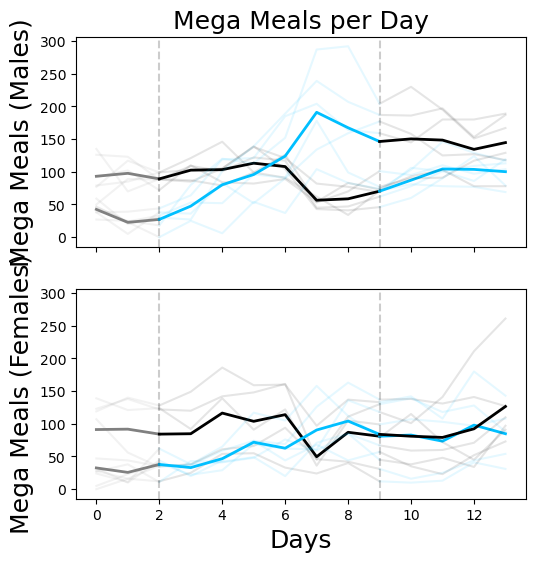

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot individual timelines
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt.subplots()  # Create a new figure and axis if none are provided
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)  # Plot individual traces with transparency
    ax.plot(np.mean(data, axis=0), linewidth=2)  # Plot the mean line

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")  # Add vertical reference lines
    ax.axvline(9, linestyle="--", color="k")

    return ax

# Function to plot multicolored timeline with split phases (PR/NR)
def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots()  # Create a new figure and axis if none are provided

    for group in data:
        for trace in group:
            trace = trace[:max_days]  # Ensure the trace is within the max_days range
            ax.plot(range(0, 3), trace[:3], color="grey", alpha=0.1)  # Plot the grey phase
            ax.plot(range(2, 10), trace[2:10], color=colors[0], alpha=0.1)  # First phase in color
            ax.plot(range(9, len(trace)), trace[9:], color=colors[1], alpha=0.1)  # Second phase in color

        # Plot the mean values
        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0, 3), mean[:3], color="grey", linewidth=2)  # Grey phase mean
        ax.plot(range(2, 10), mean[2:10], color=colors[0], linewidth=2)  # First phase mean
        ax.plot(range(9, len(mean)), mean[9:], color=colors[1], linewidth=2)  # Second phase mean

        colors.reverse()  # Alternate color for next group

    ax.set_ylabel(ylabel, fontsize=18)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)  # Add phase split lines
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)

    return ax

# Selectors for grouping mice data
nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

# Get data for mega meals per day
nrpr_m_mega_meals = get_data_fields(mice, ["all_mega_meals_per_day"], nrpr_male_selector)
prnr_m_mega_meals = get_data_fields(mice, ["all_mega_meals_per_day"], prnr_male_selector)
nrpr_f_mega_meals = get_data_fields(mice, ["all_mega_meals_per_day"], nrpr_female_selector)
prnr_f_mega_meals = get_data_fields(mice, ["all_mega_meals_per_day"], prnr_female_selector)

# Plot the mega meals per day trend using a similar layout to your pellet intake plot
f, ax = plt.subplots(nrows=2, sharex=True, figsize=(6, 6), gridspec_kw={"left": 0.15})

# Plot for males
timeline_multicolor_fig([nrpr_m_mega_meals, prnr_m_mega_meals], colors=["black", "deepskyblue"], ylabel="Mega Meals (Males)", ax=ax[0])

# Plot for females
timeline_multicolor_fig([nrpr_f_mega_meals, prnr_f_mega_meals], colors=["black", "deepskyblue"], ylabel="Mega Meals (Females)", ax=ax[1])

# Set common X-axis label
ax[1].set_xlabel("Days", fontsize=18)

# Set a common Y-axis limit for better comparison
ax[1].set_ylim(ax[0].get_ylim())

# Add title for the overall figure
ax[0].set_title("Mega Meals per Day", fontsize=18)

# Show the plot
plt.show()

# Save the figure if needed
figfolder = r"..//plots/NEW_MEAL_PLOTS//"
# f.savefig(figfolder + "timeline_mega_meals_per_day.pdf")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot individual timelines
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt.subplots()  # Create a new figure and axis if none are provided
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)  # Plot individual traces with transparency
    ax.plot(np.mean(data, axis=0), linewidth=2)  # Plot the mean line

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")  # Add vertical reference lines
    ax.axvline(9, linestyle="--", color="k")

    return ax

# Function to plot multicolored timeline with split phases (PR/NR)
def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots()  # Create a new figure and axis if none are provided

    for group in data:
        for trace in group:
            trace = trace[:max_days]  # Ensure the trace is within the max_days range
            ax.plot(range(0, 3), trace[:3], color="grey", alpha=0.1)  # Plot the grey phase
            ax.plot(range(2, 10), trace[2:10], color=colors[0], alpha=0.1)  # First phase in color
            ax.plot(range(9, len(trace)), trace[9:], color=colors[1], alpha=0.1)  # Second phase in color

        # Plot the mean values
        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0, 3), mean[:3], color="grey", linewidth=2)  # Grey phase mean
        ax.plot(range(2, 10), mean[2:10], color=colors[0], linewidth=2)  # First phase mean
        ax.plot(range(9, len(mean)), mean[9:], color=colors[1], linewidth=2)  # Second phase mean

        colors.reverse()  # Alternate color for next group

    ax.set_ylabel(ylabel, fontsize=18)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)  # Add phase split lines
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)

    return ax

# Selectors for grouping mice data
nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

# Get data for mega meals per day
nrpr_m_mega_meals = get_data_fields(mice, ["all_mega_meals_per_day"], nrpr_male_selector)
prnr_m_mega_meals = get_data_fields(mice, ["all_mega_meals_per_day"], prnr_male_selector)
nrpr_f_mega_meals = get_data_fields(mice, ["all_mega_meals_per_day"], nrpr_female_selector)
prnr_f_mega_meals = get_data_fields(mice, ["all_mega_meals_per_day"], prnr_female_selector)

# Plot the mega meals per day trend using a similar layout to your pellet intake plot
f, ax = plt.subplots(nrows=2, sharex=True, figsize=(6, 6), gridspec_kw={"left": 0.15})

# Plot for males
timeline_multicolor_fig([nrpr_m_mega_meals, prnr_m_mega_meals], colors=["black", "deepskyblue"], ylabel="Mega Meals (Males)", ax=ax[0])

# Plot for females
timeline_multicolor_fig([nrpr_f_mega_meals, prnr_f_mega_meals], colors=["black", "deepskyblue"], ylabel="Mega Meals (Females)", ax=ax[1])

# Set common X-axis label
ax[1].set_xlabel("Days", fontsize=18)

# Set a common Y-axis limit for better comparison
ax[1].set_ylim(ax[0].get_ylim())

# Add title for the overall figure
ax[0].set_title("Mega Meals per Day", fontsize=18)

# Show the plot
plt.show()

# Save the figure if needed
figfolder = r"..//plots/NEW_MEAL_PLOTS//"
# f.savefig(figfolder + "timeline_mega_meals_per_day.pdf")